#### 영미권 메이저 언론사 트위터 페이지 크롤링

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import pandas as pd
from selenium import webdriver
from fake_useragent import UserAgent
import nltk
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.tag import pos_tag
from nltk import Text
from nltk.tokenize import RegexpTokenizer

result = []
df_bbc = []
df_newyork = []
df_fox = []
df_abc = []

url_list = ['https://twitter.com/bbcworld',
            'https://twitter.com/nytimes',
            'https://twitter.com/CNN',
            'https://twitter.com/FoxNews',
            'https://twitter.com/ABC'
           ]

for member in url_list:

    options = webdriver.ChromeOptions() 
    options.add_argument("user-agent={}".format(UserAgent().chrome))

    driver = webdriver.Chrome()
    driver.get(member)

    for count in range(10):
        
        time.sleep(1)

        script = "window.scrollTo(0, 100000);"
        driver.execute_script(script)

    items = driver.find_elements_by_css_selector("#stream-items-id .content")
    print("{} : ".format(member[20:]), len(items))

    for idx, item in enumerate(items):
        
        try:
            time_before = item.find_element_by_css_selector("div:nth-child(1) > small > a > span").text
        except:
            time_before = None
        try:
            news_comment = item.find_element_by_css_selector(".js-tweet-text-container p").text   
        except:
            news_comment = None
        try:
            news_url = item.find_element_by_css_selector("div:nth-child(1) > small > a").get_attribute("href")   
        except:
            news_url =  None
        try:
            reaction = item.find_element_by_css_selector("div:nth-child(4) > div:nth-child(2) > div:nth-child(1) .ProfileTweet-actionCountForPresentation").text   
        except:
            reaction = 0
        try:
            retweet = item.find_element_by_css_selector("div:nth-child(4) > div:nth-child(2) > div:nth-child(2) .ProfileTweet-actionCountForPresentation").text
        except:
            retweet = 0
        try:
            like = item.find_element_by_css_selector("div:nth-child(4) > div:nth-child(2) > div:nth-child(3) .ProfileTweet-actionCountForPresentation").text
        except:
            like = 0
        
        data = {
            "time(before)" : time_before,
            "news_comment" : news_comment,
            "news_url" : news_url,
            "reaction" : reaction,
            "retweet" : retweet,
            "like" : like,
            "brand" : member[20:]
        }

        result.append(data)

        df = pd.DataFrame(result)
        df = df[["brand","time(before)","reaction","retweet","like","news_comment","news_url"]]
            
    driver.quit()

bbcworld :  200
nytimes :  200
CNN :  200
FoxNews :  200
ABC :  200


#### 크롤링 결과

In [3]:
df

,brand,time(before),reaction,retweet,like,news_comment,news_url
0,bbcworld,32분,6,19,39,Are French riots a curse or a blessing for Mac...,https://twitter.com/BBCWorld/status/1065052681...
1,bbcworld,46분,27,27,49,Trump submits answers to Mueller's Russia inquiry,https://twitter.com/BBCWorld/status/1065049143...
2,bbcworld,52분,5,31,43,Letter from Africa: Cremations 'threaten' Zimb...,https://twitter.com/BBCWorld/status/1065047458...
3,bbcworld,1시간,55,347,257,"Yemen crisis: 85,000 children 'dead from malnu...",https://twitter.com/BBCWorld/status/1065040352...
4,bbcworld,2시간,14,51,78,Nedim Yasar: Reformed gangster shot after book...,https://twitter.com/BBCWorld/status/1065027537...
5,bbcworld,3시간,27,130,121,E. coli outbreak: Romaine lettuce probed in US...,https://twitter.com/BBCWorld/status/1065014096...
6,bbcworld,4시간,54,341,319,"Saudi Arabia 'tortured female activists', char...",https://twitter.com/BBCWorld/status/1064996231...
7,bbcworld,6시간,77,88,156,Trump Saudi statement: What the president's wo...,https://twitter.com/BBCWorld/status/1064975792...
8,bbcworld,10시간,20,187,490,The Finnish forest that may hold the future fo...,https://twitter.com/bbcworldservice/status/106...
9,bbcworld,6시간,24,69,100,Cameroon gunmen seize students from school,https://twitter.com/BBCWorld/status/1064963175...


#### 크롤링한 데이터 키워드 토크나이징 및 wordcloud 구현

In [7]:
comment_text = ''

for idx in range(len(df['news_comment'])):
    comment_text += df['news_comment'][idx] + ' '

In [61]:
stopwords = ["A",'US','CNN','S','News','New','Sessions','south']

retokenize = RegexpTokenizer("[\w]+")
tokens = pos_tag(retokenize.tokenize(comment_text))
names_list = [data[0] for data in tokens if data[1] == "NNP" and data[0] not in stopwords]
fd_names = FreqDist(names_list)

In [62]:
fd_names.most_common(20)

[('Trump', 138),
 ('House', 68),
 ('California', 56),
 ('President', 50),
 ('White', 43),
 ('Chicago', 35),
 ('Khashoggi', 31),
 ('Saudi', 25),
 ('Ivanka', 24),
 ('Jamal', 24),
 ('Jeff', 24),
 ('Thanksgiving', 21),
 ('Clinton', 20),
 ('Pres', 20),
 ('POTUS', 19),
 ('Florida', 17),
 ('Former', 16),
 ('Senate', 16),
 ('York', 16),
 ('Mueller', 15)]

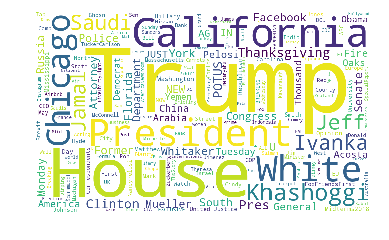

In [63]:
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()